In [1]:
import os

from PIL import Image, ImageDraw, ImageColor, ImageFont, ImageMath
from matplotlib import pyplot as plt
import numpy as np

from core import RootCore

In [2]:
# init
core = RootCore.RootCore(
    './data/det_net.xml',
    './data/score_net.xml',
    '', # model encryption not implemented for now
    device_name='cpu',
    backend='openvino',
    det_vino_device='CPU',
    score_vino_device='MULTI'
    # score_vino_device='MYRIAD'
)

det device: CPU, score MYRIAD device(s): 2


In [3]:
# low level api
bboxes = core.detect('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg')
score_bboxes = core.bbox_score('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg', bboxes)

print(score_bboxes)

[[122.33738708496094, 89.09738159179688, 295.6815490722656, 275.31365966796875, 83.6397933959961], [336.32098388671875, 126.9676513671875, 502.177978515625, 363.93048095703125, 89.38674926757812]]


In [4]:
# high level api
all_in_one_score_bboxes = core.score('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg')

print(all_in_one_score_bboxes)

[[122.33738708496094, 89.09738159179688, 295.6815490722656, 275.31365966796875, 83.6397933959961], [336.32098388671875, 126.9676513671875, 502.177978515625, 363.93048095703125, 89.38674926757812]]


In [5]:
# draw
BBOX_COLOR_NAME = 'blue'
SCORE_COLOR_NAME = 'lime'
BBOX_LINE_WIDTH = 2

font = ImageFont.truetype('./core/resource/arial.ttf', 24)

def _convert_I16_to_L(i16_img):
    im2 = ImageMath.eval('im/256', {'im':i16_img}).convert('L')

    return im2

def draw_score_bboxes(picture_path, score_bboxes, bbox_color_name=BBOX_COLOR_NAME, score_color_name=SCORE_COLOR_NAME, bbox_line_width=BBOX_LINE_WIDTH, draw_score=True):
    img = Image.open(picture_path)
    
    if img.mode == 'I':
        img = _convert_I16_to_L(img)

    img = img.convert('RGB')

    draw = ImageDraw.Draw(img)

    for score_bbox in score_bboxes:
        bbox = score_bbox[:4]

        draw.rectangle(
            bbox,
            outline=ImageColor.getrgb(bbox_color_name),
            width=bbox_line_width
        )

        if draw_score:
            score = score_bbox[4]
            
            draw.text(
                bbox[:2],
                '{:.2f}'.format(score),
                font=font,
                fill=ImageColor.getrgb(score_color_name)
            )

    del draw

    # img.save(imgArr, format='JPEG')
    fig=plt.figure(figsize=(16,12))
    plt.imshow(np.asarray(img))
    plt.show()

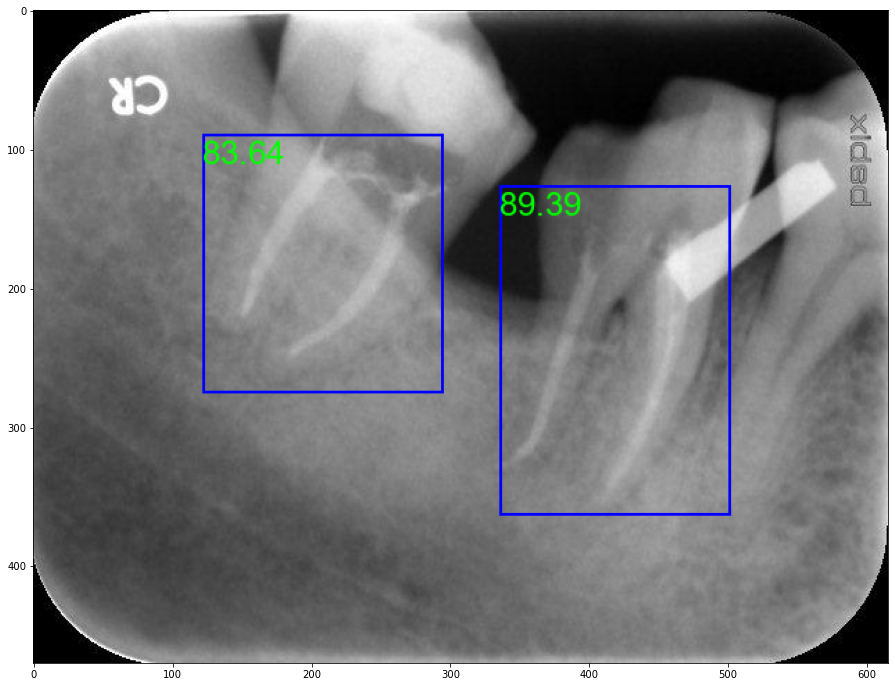

In [6]:
draw_score_bboxes('./data/1a375421-9b33-40fa-8750-8cb3dd9b2079.jpg', all_in_one_score_bboxes, draw_score=True)